### PROJECT5-2 날씨 좋은 월요일 오후 세시, 자전거 타는 사람은 몇 명? 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### (1) 데이터 가져오기 
- [Kaggle:Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data?select=test.csv)

In [36]:
train = pd.read_csv('/home/aiffel/Aiffel/05_bike_regression/data/train.csv')

In [41]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


#### (2) Datetime 자료형으로 변환 및 Column생성

In [42]:
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


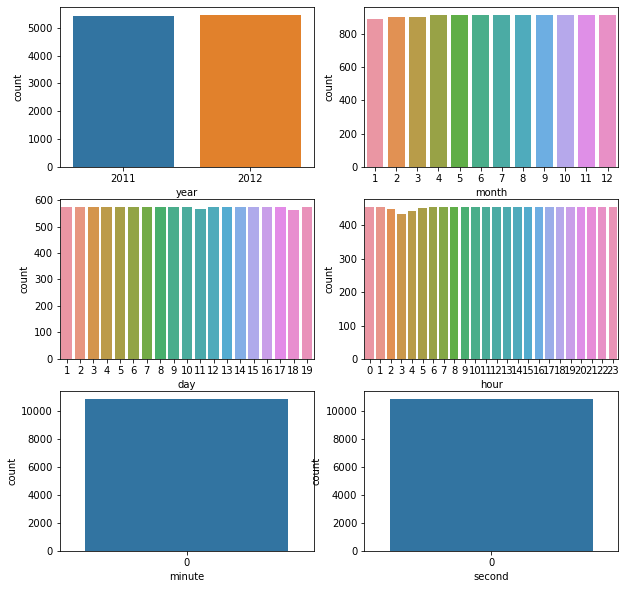

In [35]:
column_ls = ['year', 'month', 'day', 'hour', 'minute', 'second']
plt.figure(figsize=(10,10))
for i, column in enumerate(column_ls):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=column, data=train)

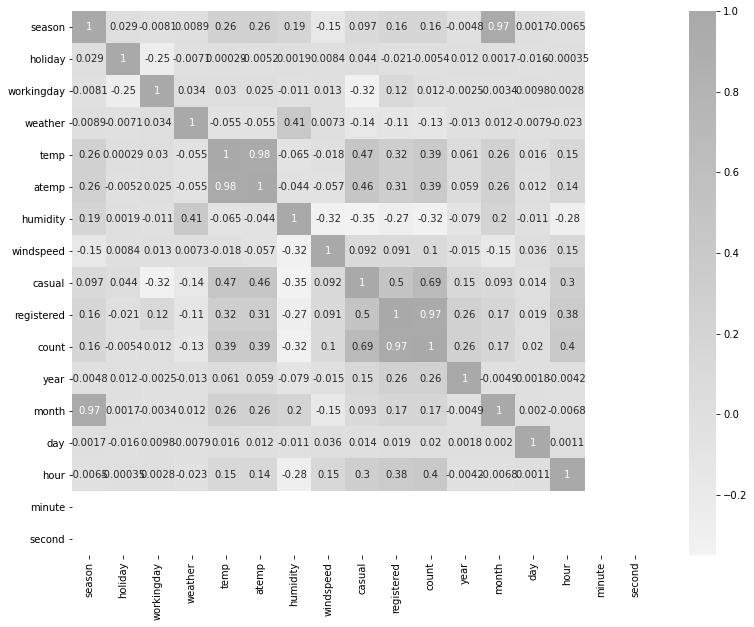

In [76]:
plt.figure(figsize=(13,10))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(train.corr(), annot=True, cmap=cmap)
plt.show()

In [53]:
columns_ls = ['year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 're']
X = train[columns_ls]
y = train['count']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)
print(y_pred)

[248.56185587  48.01600246 202.33368078 ... 119.99078191 164.11407538
  65.7708813 ]


In [114]:
mse = mean_squared_error(y_test, y_pred)
rmse=mse**0.5
print(f'rmse : {rmse}')

rmse : 141.7440379925846


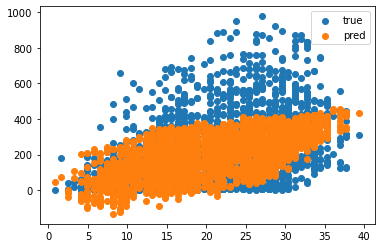

In [115]:
plt.scatter(X_test['temp'], y_test, label='true')
plt.scatter(X_test['temp'], y_pred, label='pred')
plt.legend()
plt.show()